In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'C:\Users\Khazir\Desktop\processes2.csv')

In [4]:
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [5]:
df1 = df.dropna()

In [6]:
df1.shape

(2095, 14)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB


In [8]:
df1.isnull().sum()

Unnamed: 0            0
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats                 0
max_power (in bph)    0
Mileage Unit          0
Mileage               0
Engine (CC)           0
dtype: int64

In [9]:
df1.rename(columns={'Mileage Unit': 'Mileage_Unit'},inplace=True)

In [10]:
df1.Mileage_Unit.value_counts()

Mileage_Unit
kmpl     2075
km/kg      20
Name: count, dtype: int64

In [50]:
import pandas as pd

# If df1 is a view of another DataFrame, ensure it's a copy
df1 = df1.copy()

# Replace fuel values safely
df1.loc[:, 'fuel'] = df1['fuel'].replace({'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3})
df1.loc[:, 'seller_type'] = df1['seller_type'].replace({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})
df1.loc[:, 'transmission'] = df1['transmission'].replace({'Manual': 0, 'Automatic': 1})
df1.loc[:, 'owner'] = df1['owner'].replace({'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4})
df1.loc[:, 'Mileage_Unit'] = df1['Mileage_Unit'].replace({'kmpl': 0, 'km/kg': 1})
# Optionally, address the FutureWarning
pd.set_option('future.no_silent_downcasting', True)


In [52]:
df1.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage_Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,0,0,0,0,5,74.00,0,23.40,1248
1,2,Hyundai,2010,225000,127000,0,0,0,0,5,90.00,0,23.00,1396
2,4,Hyundai,2017,440000,45000,1,0,0,0,5,81.86,0,20.14,1197
3,7,Toyota,2011,350000,90000,0,0,0,0,5,67.10,0,23.59,1364
4,8,Ford,2013,200000,169000,0,0,0,0,5,68.10,0,20.00,1399


In [22]:
x = df1.drop(['selling_price','name'],axis = 1).values
y = df1['selling_price']

In [23]:
from sklearn.model_selection import train_test_split 

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [35]:
y_train

1217    800000
1619    130000
398     135000
614     577000
406     280000
         ...  
2034    320000
1716    330000
570     484999
2019    399000
1651     80000
Name: selling_price, Length: 1885, dtype: int64

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [37]:
lin_reg_model = LinearRegression()

In [38]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [39]:
prediction = lin_reg_model.predict(x_train)

In [41]:
print(prediction)

[594706.65260676 127095.00834344  59105.24028076 ... 578043.10106024
 487103.69769178 -54419.72930594]


In [45]:
from sklearn import metrics

In [47]:
score = metrics.r2_score(y_train,prediction)
print(score)

0.7403927873270172


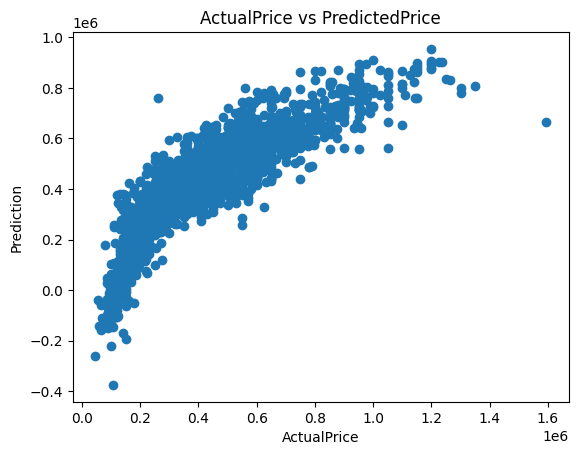

In [53]:
plt.scatter(y_train,prediction)
plt.xlabel("ActualPrice")
plt.ylabel("Prediction")
plt.title("ActualPrice vs PredictedPrice")
plt.show()

In [54]:
prediction1 = lin_reg_model.predict(x_test)

In [56]:
print(prediction1)

[201001.61712249 405107.58438396 352298.50184822 662599.01788789
 423765.25599693 176613.57299675 348924.03813705 369366.08586979
 597380.58441465 704005.59837137 490835.14779367 775013.64222793
 545692.47051302 433728.06937048 461690.80606511 476178.55846974
 599708.69458438 588350.21623006 375580.10316479 681566.17100847
 390604.94933586 216829.2084465  319925.89238106 741229.33084606
 508560.96542549 402944.02491693  87258.53391895 244302.59360209
 479211.10358305 754233.08913036 439668.41045792 597041.02412327
 281470.59655483 402354.39473251 812376.17032503 325276.06789103
 554863.82316419 278397.71144852 834659.61395411 457510.38810565
 628809.6420045  412581.4199135  407317.01807961  58909.27234364
 554679.39404799 422656.74850988 183563.01050195 417609.78230226
 184807.21457271  26547.7669877  723973.88364275 425522.68031673
 361275.37136297 523094.59888318 600531.16880734 421498.42153858
 623227.15186584 -94820.71905862 303947.69269857 -20625.66336308
 463325.96138769 556376.5

In [58]:
score1 = metrics.r2_score(y_test,prediction1)
print(score1)

0.7481711438780956


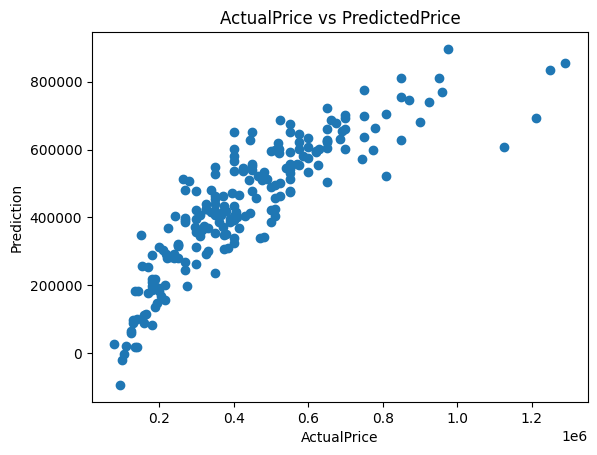

In [59]:
plt.scatter(y_test,prediction1)
plt.xlabel("ActualPrice")
plt.ylabel("Prediction")
plt.title("ActualPrice vs PredictedPrice")
plt.show()